<a href="https://colab.research.google.com/github/shashi3876/data-wrangling/blob/main/Benfords_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_first_digit_distribution(df, column_name):
  # Remove any values that start with 0
   
    # Extract the first digit of each value in the specified column
    first_digits = df[column_name].astype(str).str[0]
    #print(first_digits )
    first_digits =first_digits[first_digits!='0']
    #print(first_digits )
    # Calculate the frequency of each first digit
    digit_counts = first_digits.value_counts()
    
    #print(digit_counts)

    # Get a set of all possible digits
    all_digits = set(range(1, 10))
    all_digits = set(map(str, all_digits))
    # Check which digits are missing and add them with count 0
    #print(f'digit_counts.index={digit_counts.index} all_digits={all_digits}')
    missing_digits = all_digits - set(digit_counts.index)
    #print(f'digit_counts.index={digit_counts.index} all_digits={all_digits}')
    #print(missing_digits)
    if missing_digits:
        missing_counts = pd.Series(0, index=missing_digits)
        digit_counts = digit_counts.append(missing_counts).sort_index()
    digit_counts = digit_counts.sort_index()

    # Calculate the proportion of each first digit
    total_count = digit_counts.sum()
    digit_proportions = digit_counts / total_count
    
    #print(digit_counts)
    # Return a dictionary with the digit and its proportion
    return digit_proportions.to_dict()

def plot_benfords_law():
    # Calculate Benford's Law distribution
    digits = np.arange(1, 10)
    benford_proportions = np.log10(1 + 1 / digits)
    
    # Plot Benford's Law
    plt.bar(digits, benford_proportions)
    plt.xlabel('First Digit')
    plt.ylabel('Proportion')
    plt.title("Benford's Law")
    plt.show()

def compare_to_benfords_law(df, column_name):
    # Get the first digit distribution of the column
    digit_distribution = get_first_digit_distribution(df, column_name)
    
    # Calculate Benford's Law distribution
    digits = np.arange(1, 10)
    benford_proportions = np.log10(1 + 1 / digits)
    
    # Plot the actual distribution and Benford's Law
    fig, ax = plt.subplots()
    ax.bar(digits - 0.2, benford_proportions, width=0.4, label="Benford's Law")
    ax.bar(digits + 0.2, digit_distribution.values(), width=0.4, label="Actual")
    ax.set_xlabel('First Digit')
    ax.set_ylabel('Proportion')
    ax.set_title('First Digit Distribution')
    ax.legend()
    plt.show()




In [71]:

'''
def get_first_digit_distribution(df, column_name):
    # Remove any values that start with 0
    df = df[df[column_name].astype(str).str[0] != '0']

    # Extract the first digit of each value in the specified column
    first_digits = df[column_name].astype(str).str[0]

    # Calculate the frequency of each first digit
    digit_counts = first_digits.value_counts().sort_index()

    # Get a list of all possible digits
    all_digits = pd.Series(range(1, 10))

    # Check which digits are missing and add them with count 0
    missing_digits = all_digits[~all_digits.isin(digit_counts.index)]
    if not missing_digits.empty:
        missing_counts = pd.Series(0, index=missing_digits)
        digit_counts = digit_counts.append(missing_counts).sort_index()

    # Calculate the proportion of each first digit
    total_count = digit_counts.sum()
    digit_proportions = digit_counts / total_count

    # Return a dictionary with the digit and its proportion
    return digit_proportions.to_dict()
    '''

"\ndef get_first_digit_distribution(df, column_name):\n    # Remove any values that start with 0\n    df = df[df[column_name].astype(str).str[0] != '0']\n\n    # Extract the first digit of each value in the specified column\n    first_digits = df[column_name].astype(str).str[0]\n\n    # Calculate the frequency of each first digit\n    digit_counts = first_digits.value_counts().sort_index()\n\n    # Get a list of all possible digits\n    all_digits = pd.Series(range(1, 10))\n\n    # Check which digits are missing and add them with count 0\n    missing_digits = all_digits[~all_digits.isin(digit_counts.index)]\n    if not missing_digits.empty:\n        missing_counts = pd.Series(0, index=missing_digits)\n        digit_counts = digit_counts.append(missing_counts).sort_index()\n\n    # Calculate the proportion of each first digit\n    total_count = digit_counts.sum()\n    digit_proportions = digit_counts / total_count\n\n    # Return a dictionary with the digit and its proportion\n    retur

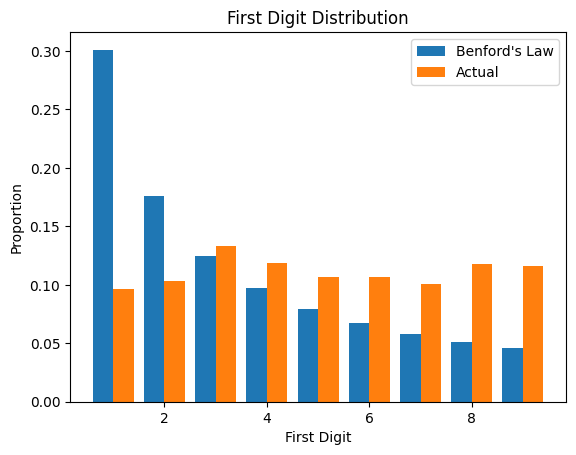

In [72]:
def generate_fake_data(n_samples):
    # Generate random numbers between 1 and 10^6
    data = np.random.randint(1, 10**6, size=n_samples)
    
    # Convert the numbers to a pandas DataFrame
    df = pd.DataFrame({'numbers': data})
    
    return df
df=generate_fake_data(1000) 
#print(df)   
compare_to_benfords_law(df, 'numbers')

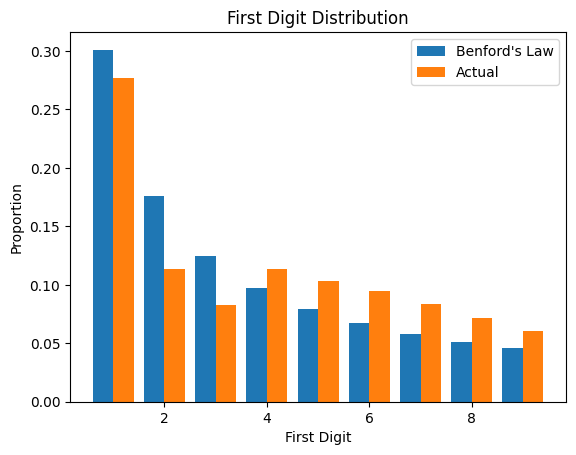

In [73]:
import seaborn as sns

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Call the compare_to_benfords_law function with the desired column name
compare_to_benfords_law(diamonds, 'price')

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<ipython-input-70-a5920f400d12>:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  digit_counts = digit_counts.append(missing_counts).sort_index()


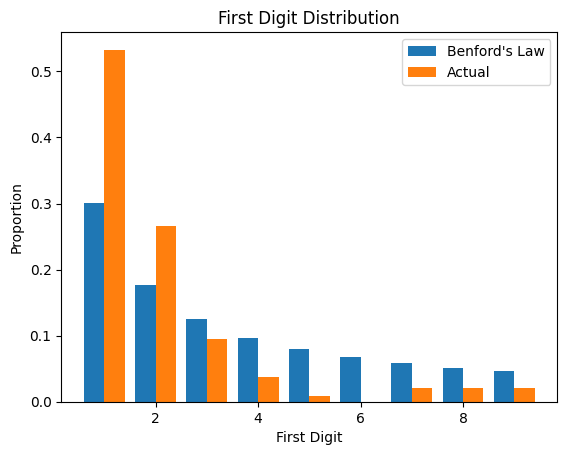

In [74]:
# Load the tips dataset
tips = sns.load_dataset("tips")
print(tips)
# Call the compare_to_benfords_law function with the desired column name
compare_to_benfords_law(tips, 'total_bill')